In [83]:
# Step 1: Data Loading and Exploration (assuming you have your dataset loaded from Project 1)
# Ensure you have X_train, X_test, y_train, y_test from your dataset
# Add any additional necessary libraries for data preprocessing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Step 2: Model Development
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from numpy import interp
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from itertools import cycle

# Load the dataset
df = pd.read_csv("SofwareDeveloperIncomeExpensesperUSACity.csv")

# Specify the columns 
columns_to_keep = [
    'Mean Software Developer Salary (adjusted)', 
    'Median Home Price', 
    'Cost of Living avg', 
    'Rent avg'
]

# Subset the DataFrame to include only the specified columns
df = df[columns_to_keep]

# Define custom outlier criteria for 'Cost of Living avg' and 'Rent avg'
custom_outlier_columns = ['Cost of Living avg', 'Rent avg']
for column in custom_outlier_columns:
    # Define outliers as values greater than 10000
    outliers = df[column] > 10000
    
    # Calculate mean of the non-outlier values and round it to 1 decimal place
    mean_value = round(df.loc[~outliers, column].mean(), 1)
    
    # Replace outliers with the rounded mean value
    df.loc[outliers, column] = mean_value

# Fill any remaining missing values with the column means (for numeric columns only),
# rounded to 1 decimal place
mean_values = df.mean().round(1)
df.fillna(mean_values, inplace=True)

# Save the cleaned and subsetted dataset
df.to_csv("Cleaned_and_Subsetted_SofwareDeveloperIncomeExpensesperUSACity_Rounded.csv", index=False)
df

,Mean Software Developer Salary (adjusted),Median Home Price,Cost of Living avg,Rent avg
0,117552.0,192000.0,984.8,1421.5
1,117323.0,491600.0,1250.7,2528.2
2,114122.0,208500.0,989.9,1974.5
3,112118.0,296500.0,1049.2,1594.0
4,111616.0,124100.0,961.2,1072.1
...,...,...,...,...
72,89040.0,146500.0,1065.5,1355.1
73,88249.0,283400.0,1102.1,2494.4
74,88249.0,283400.0,1086.0,2171.9
75,85912.0,293900.0,984.0,1448.0


In [77]:
# Load cleaned and subsetted dataset
df_cleaned = pd.read_csv("Cleaned_and_Subsetted_SofwareDeveloperIncomeExpensesperUSACity_Rounded.csv")

# Calculate the 'Price-to-Income Ratio' according formula below
df_cleaned['Price-to-Income Ratio'] = (df_cleaned['Median Home Price'] / (df_cleaned['Mean Software Developer Salary (adjusted)'] - (df_cleaned['Cost of Living avg'] + df_cleaned['Rent avg'])*12)).round(1)
# Determine a threshold for affordability classification
# Using the median of the 'Price-to-Income Ratio' as a threshold to classify cities into "Affordable" vs "Not Affordable"
threshold = df_cleaned['Price-to-Income Ratio'].median()

# Classify cities based on the 'Price-to-Income Ratio' compared to the threshold
df_cleaned['Affordability_Class'] = (df_cleaned['Price-to-Income Ratio'] <= threshold).astype(int)  # 1 for Affordable, 0 for Not Affordable

# convert the binary indicator into descriptive labels 
df_cleaned['Affordability_Class_Label'] = df_cleaned['Affordability_Class'].map({1: 'Affordable', 0: 'Not Affordable'}).astype('category')

df_targeted = df_cleaned.to_csv("Targeted_SofwareDeveloperIncomeExpensesperUSACity_Rounded.csv", index=False)

df_cleaned

,Mean Software Developer Salary (adjusted),Median Home Price,Cost of Living avg,Rent avg,Price-to-Income Ratio,Affordability_Class,Affordability_Class_Label
0,117552.0,192000.0,984.8,1421.5,2.2,1,Affordable
1,117323.0,491600.0,1250.7,2528.2,6.8,0,Not Affordable
2,114122.0,208500.0,989.9,1974.5,2.7,1,Affordable
3,112118.0,296500.0,1049.2,1594.0,3.7,0,Not Affordable
4,111616.0,124100.0,961.2,1072.1,1.4,1,Affordable
...,...,...,...,...,...,...,...
72,89040.0,146500.0,1065.5,1355.1,2.4,1,Affordable
73,88249.0,283400.0,1102.1,2494.4,6.3,0,Not Affordable
74,88249.0,283400.0,1086.0,2171.9,5.8,0,Not Affordable
75,85912.0,293900.0,984.0,1448.0,5.2,0,Not Affordable


In [84]:
# Looading result from generated by above processes
df_targeted = pd.read_csv('Targeted_SofwareDeveloperIncomeExpensesperUSACity_Rounded.csv')
# Define independent variables and dependent variable in my dataset
X = df_targeted[['Mean Software Developer Salary (adjusted)', 'Median Home Price', 'Cost of Living avg', 'Rent avg']]
y = df_targeted['Affordability_Class']  

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Model Training

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [96]:

# Step 4: Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg_predictions = log_reg_model.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
# dealing with binary classification and non-numeric labels, 
# need to specify which label is considered the positive class through the pos_label parameter.
log_reg_precision = precision_score(y_test, log_reg_predictions)

log_reg_recall = recall_score(y_test, log_reg_predictions)

log_reg_f1 = f1_score(y_test, log_reg_predictions)

# Printout the result to view 
print(f" log_reg_accuracy: {log_reg_predictions},\n log_reg_precision: {log_reg_precision},\n log_reg_recall:{log_reg_recall},\n log_reg_f1:{log_reg_f1}")



 log_reg_accuracy: [1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1],
 log_reg_precision: 0.9411764705882353,
 log_reg_recall:1.0,
 log_reg_f1:0.9696969696969697


Logistic Regression - Accuracy: 0.96, Precision: 0.94, Recall: 1.00, F1 Score: 0.97


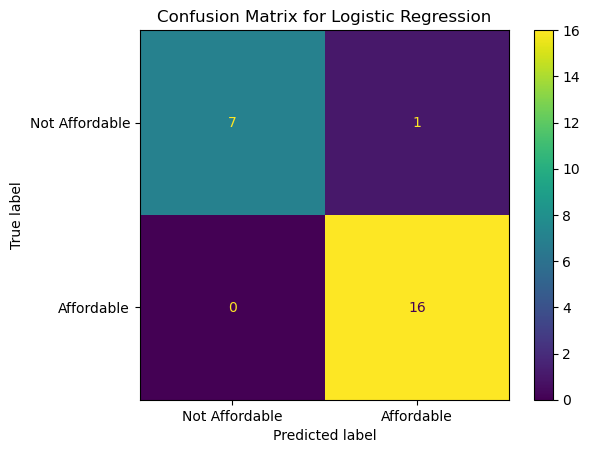

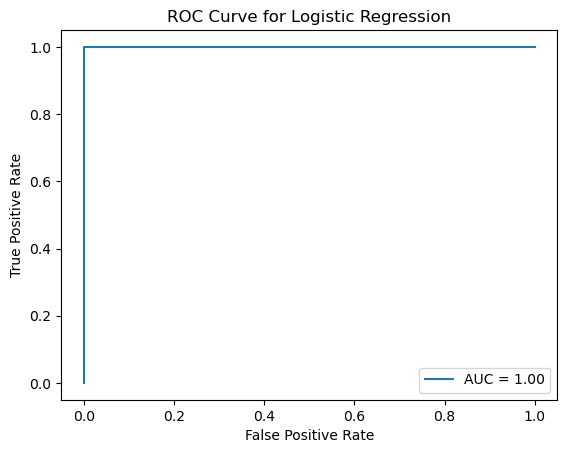

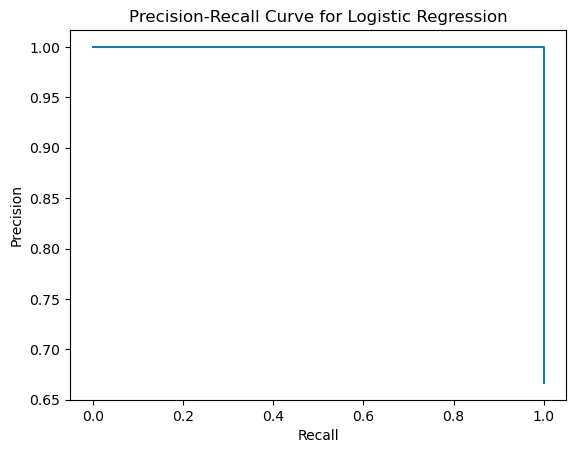

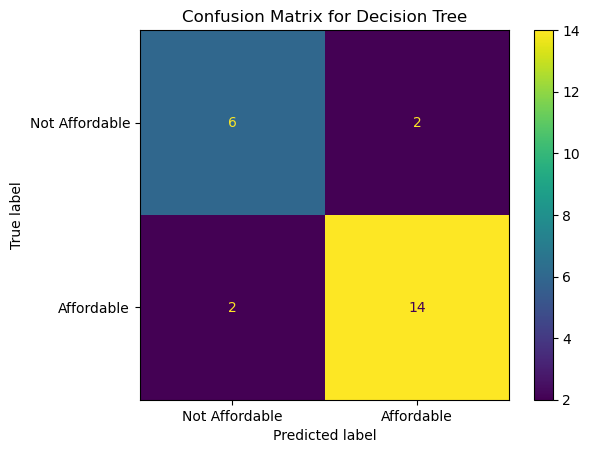

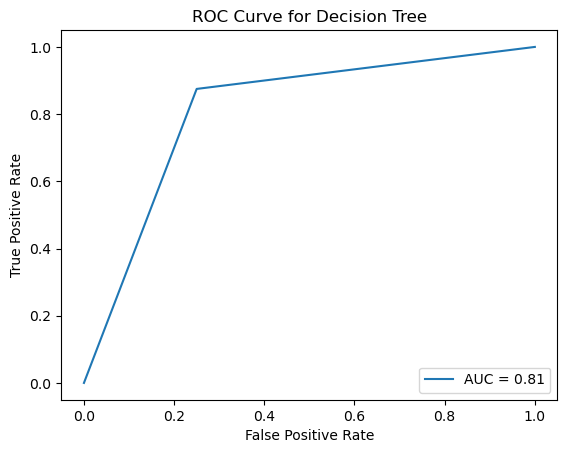

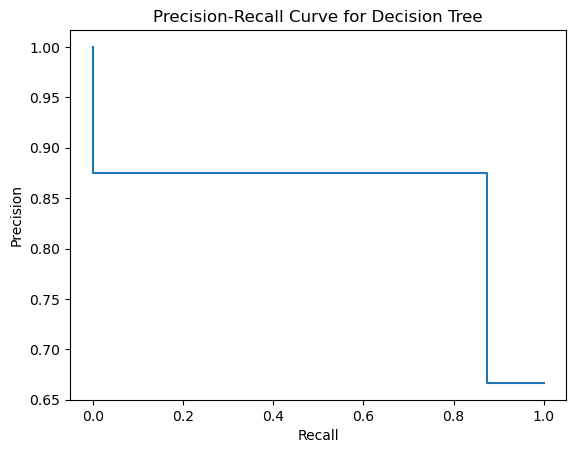

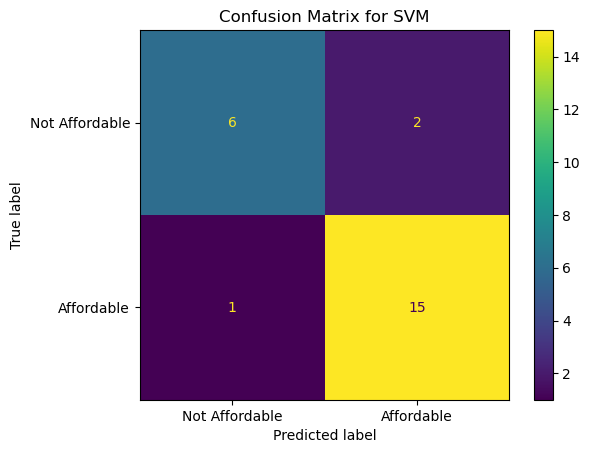

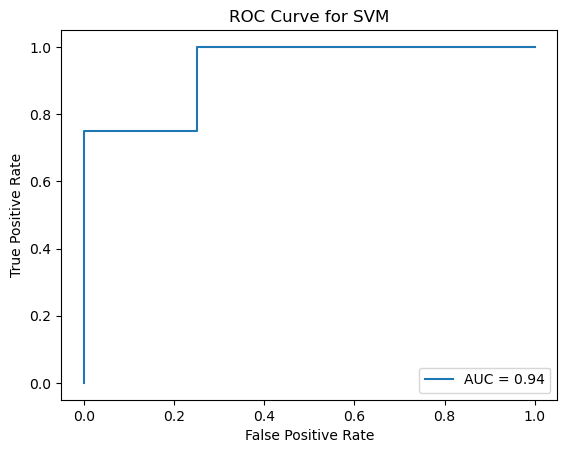

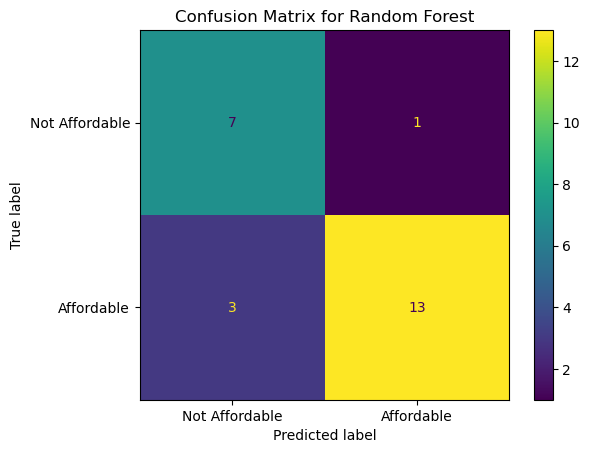

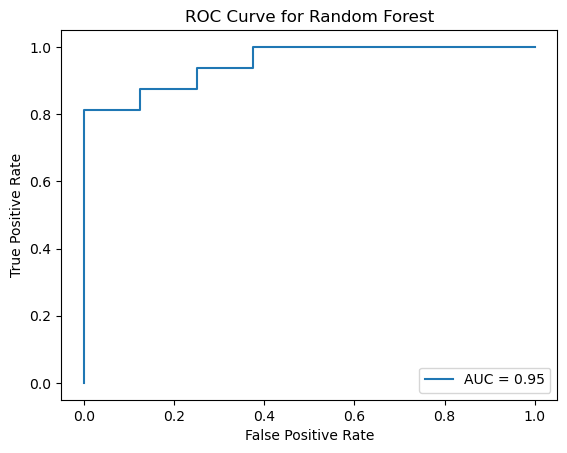

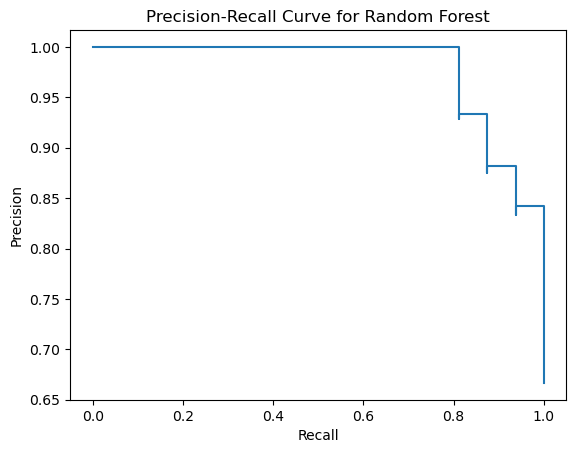

In [88]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize

# Step 5: Visualization of Results
# Add visualization code here such as confusion matrices, ROC curves, or precision-recall curves for each model

# Corrected precision, recall, and F1 score calculation
# Since you are using binary classification, specify pos_label=1
log_reg_precision = precision_score(y_test, log_reg_predictions, pos_label=1)
log_reg_recall = recall_score(y_test, log_reg_predictions, pos_label=1)
log_reg_f1 = f1_score(y_test, log_reg_predictions, pos_label=1)

# Print out the scores
print(f"Logistic Regression - Accuracy: {log_reg_accuracy:.2f}, Precision: {log_reg_precision:.2f}, Recall: {log_reg_recall:.2f}, F1 Score: {log_reg_f1:.2f}")

# for generating visulization of results repeatedly 
models = {
    'Logistic Regression': log_reg_model,
    'Decision Tree': dt_model,
    'SVM': svm_model,
    'Random Forest': rf_model
}

# prepare for ROC and precision-recall curve plotting
# binarize y_test for ROC and precision-recall curves
y_test_bin = label_binarize(y_test, classes=[0, 1]).ravel()

for name, model in models.items():
    # Confusion Matrix
    # references:  https://www.youtube.com/watch?app=desktop&v=xEZUIfpCkRs
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    ConfusionMatrixDisplay(cm, display_labels=['Not Affordable', 'Affordable']).plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # ROC Curve, only for models that have decision_function or predict_proba
    # references: https://www.statology.org/plot-roc-curve-python/
    if hasattr(model, "decision_function") or hasattr(model, "predict_proba"):
        if hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test)
        else:
            y_score = model.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test_bin, y_score)
        roc_auc = auc(fpr, tpr)
        RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
        plt.title(f'ROC Curve for {name}')
        plt.show()

    # Precision-Recall Curve
    #  references: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test_bin, y_score)
        pr_auc = auc(recall, precision)
        PrecisionRecallDisplay(precision=precision, recall=recall).plot()
        plt.title(f'Precision-Recall Curve for {name}')
        plt.show()
# Feel free to modify the code and add necessary comments or explanations as needed for your dataset and models.
